In [124]:
import pandas as pd
import seaborn as sb

print("{} version {}".format(pd.__name__, pd.__version__))
print("{} version {}".format(sb.__name__, sb.__version__))

pandas version 1.0.5
seaborn version 0.10.1


Load the diamonds dataset

In [125]:
df = pd.read_csv('diamonds.csv')

use head,info and describe

In [126]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [127]:
df['cut'][1:4]

1    Premium
2       Good
3    Premium
Name: cut, dtype: object

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [129]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


How many diamonds per color?

In [130]:
df.groupby('color').size()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
dtype: int64

How many diamonds per cut?

In [131]:
df.groupby('cut').size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

How many diamonds per clarity?

In [132]:
df.groupby('clarity').size()

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
dtype: int64

What is the average price per cut?

In [133]:
df.groupby('cut').price.mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

Show all diamonds with price less than 1000$ 

In [134]:
df[df['price']<1000]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53635,0.30,Ideal,I,VVS1,62.1,56.0,552,4.30,4.33,2.68
53636,0.30,Ideal,D,SI1,61.6,57.0,552,4.28,4.32,2.65
53637,0.30,Very Good,D,SI1,62.5,57.0,552,4.26,4.28,2.67
53638,0.30,Ideal,D,SI1,61.0,57.0,552,4.29,4.33,2.63


Show price distribution (using seaborn distplot)

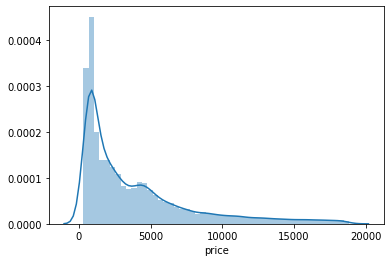

In [135]:
sb.distplot(df['price'])

using countplot show how many diamonds per cut

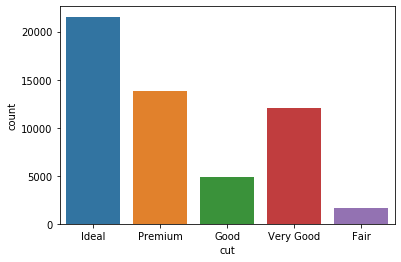

In [136]:
sb.countplot(x='cut', data=df)

using countplot show how many diamonds per cut and color (using hue)

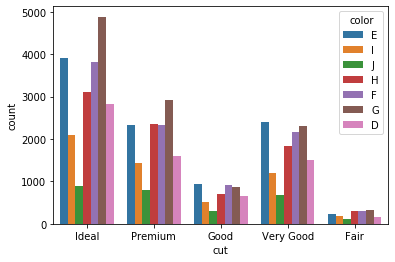

In [137]:
ax = sb.countplot(x='cut', hue="color", data=df)

display dataset correlation 

In [138]:
corr = df.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


create heatmap from the dataset correlation

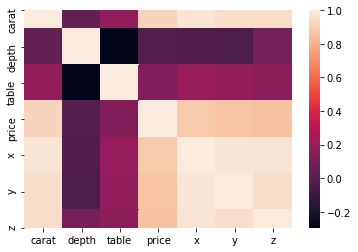

In [139]:
sb.heatmap(corr)

Create a pair plot

In [140]:
#sb.pairplot(df)

Find all the diamonds with more than 10 percent difference between x and y

In [141]:
df[ (df['x']/df['y'] > 0.1) | (df['y']/df['x'] > 0.1) ]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


use scatterplot to find correlation between x and y

In [142]:
# df.plot.scatter(x='x',y='y')

Find all the diamonds with z > x

In [143]:
df[ df['z'] > df['x'] ]

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49905,0.50,Very Good,G,VVS1,63.7,58.0,2180,5.01,5.04,5.06


# Data preparing 

delete all the diamonds with more than 10 percent difference between x and y

In [144]:
df.drop( df[ (df['x']/df['y'] > 0.1) ].index )

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


Create a new column 'xy' with the mean value of x and y

In [145]:
col = df.loc[:,'x':'y']
df['xy'] = col.mean(axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,xy
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3.965
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.865
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.060
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.215
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.345
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5.755
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.720
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,5.670
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,6.135


delete columns x,y

In [146]:
df.drop(['x', 'y'], axis=1)

,carat,cut,color,clarity,depth,table,price,z,xy
0,0.23,Ideal,E,SI2,61.5,55.0,326,2.43,3.965
1,0.21,Premium,E,SI1,59.8,61.0,326,2.31,3.865
2,0.23,Good,E,VS1,56.9,65.0,327,2.31,4.060
3,0.29,Premium,I,VS2,62.4,58.0,334,2.63,4.215
4,0.31,Good,J,SI2,63.3,58.0,335,2.75,4.345
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,3.50,5.755
53936,0.72,Good,D,SI1,63.1,55.0,2757,3.61,5.720
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,3.56,5.670
53938,0.86,Premium,H,SI2,61.0,58.0,2757,3.74,6.135


Convert the color feature to int value

In [147]:
def str_to_int(str):
    return ord(str)
df['color'] = df['color'].apply(str_to_int)

delete the columns cut and clarity 

In [148]:
df.drop(['cut', 'clarity'], axis=1)

,carat,color,depth,table,price,x,y,z,xy
0,0.23,69,61.5,55.0,326,3.95,3.98,2.43,3.965
1,0.21,69,59.8,61.0,326,3.89,3.84,2.31,3.865
2,0.23,69,56.9,65.0,327,4.05,4.07,2.31,4.060
3,0.29,73,62.4,58.0,334,4.20,4.23,2.63,4.215
4,0.31,74,63.3,58.0,335,4.34,4.35,2.75,4.345
...,...,...,...,...,...,...,...,...,...
53935,0.72,68,60.8,57.0,2757,5.75,5.76,3.50,5.755
53936,0.72,68,63.1,55.0,2757,5.69,5.75,3.61,5.720
53937,0.70,68,62.8,60.0,2757,5.66,5.68,3.56,5.670
53938,0.86,72,61.0,58.0,2757,6.15,6.12,3.74,6.135
